In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data=pd.read_csv('Mall_Customers.csv')
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# Rename the columns name

In [4]:
data.rename(columns=lambda x: x.strip(), inplace=True)


In [5]:
import pandas as pd

# Assuming 'df' is your DataFrame
data.rename(columns={
    'Annual Income (k$)':'Annual_income',
    'Spending Score (1-100)':'Spending_Score'
}, inplace=True)

# The columns in the DataFrame 'df' are renamed in place


In [6]:
data

,CustomerID,Gender,Age,Annual_income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [7]:
data.drop('CustomerID', axis=1,inplace=True)

In [8]:
data

,Gender,Age,Annual_income,Spending_Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


# watching out is there any duplicates rows

In [9]:
import pandas as pd

# Assuming 'df' is your DataFrame
duplicates = data[data.duplicated(keep=False)]
duplicates


,Gender,Age,Annual_income,Spending_Score


# Treating outliers

In [10]:
data.describe()

,Age,Annual_income,Spending_Score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [11]:
# data['quantity_tons'] = pd.to_numeric(datas['quantity_tons'], errors='coerce')
q3 = data.Age.quantile(0.75)
q1 = data.Age.quantile(0.25)
iqr = (q3 - q1)
upper_tres = q3 + (1.5*iqr)
lower_tres = q1 - (1.5*iqr)
upper_tres,lower_tres

(79.375, -1.625)

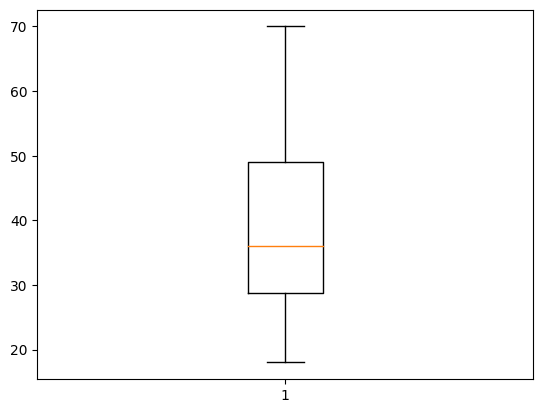

In [12]:
# Creating plot
plt.boxplot(data['Age'])
 
# show plot
plt.show()

In [13]:
# data['quantity_tons'] = pd.to_numeric(datas['quantity_tons'], errors='coerce')
q3 = data.Annual_income.quantile(0.75)
q1 = data.Annual_income.quantile(0.25)
iqr = (q3 - q1)
upper_tres = q3 + (1.5*iqr)
lower_tres = q1 - (1.5*iqr)
upper_tres,lower_tres

(132.75, -13.25)

In [14]:
data['Annual_income'] = data['Annual_income'].clip(upper_tres,lower_tres)

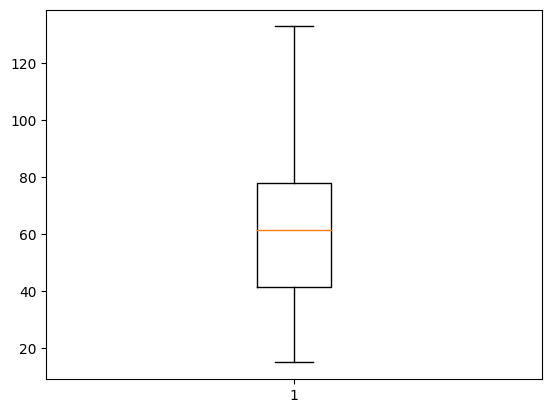

In [15]:
# Creating plot
plt.boxplot(data['Annual_income'])
 
# show plot
plt.show()

In [16]:
# data['quantity_tons'] = pd.to_numeric(datas['quantity_tons'], errors='coerce')
q3 = data.Spending_Score.quantile(0.75)
q1 = data.Spending_Score.quantile(0.25)
iqr = (q3 - q1)
upper_tres = q3 + (1.5*iqr)
lower_tres = q1 - (1.5*iqr)
upper_tres,lower_tres

(130.375, -22.625)

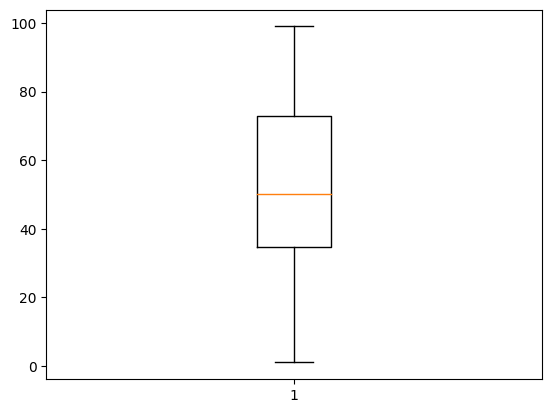

In [17]:
# Creating plot
plt.boxplot(data['Spending_Score'])
 
# show plot
plt.show()

# skewness

<Figure size 800x600 with 0 Axes>

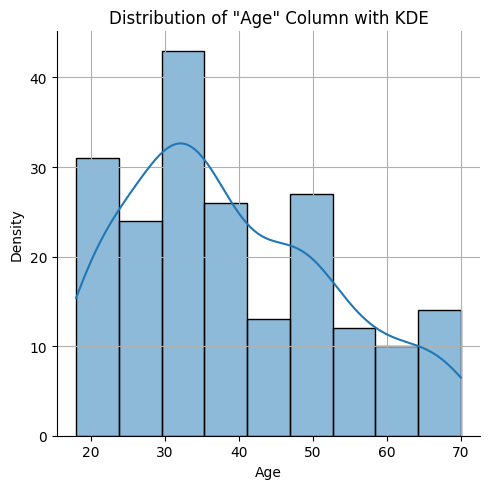

In [18]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.displot(data['Age'], kde=True)
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Distribution of "Age" Column with KDE')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

In [19]:
data['Age'].skew()

0.48556885096681657

<Figure size 800x600 with 0 Axes>

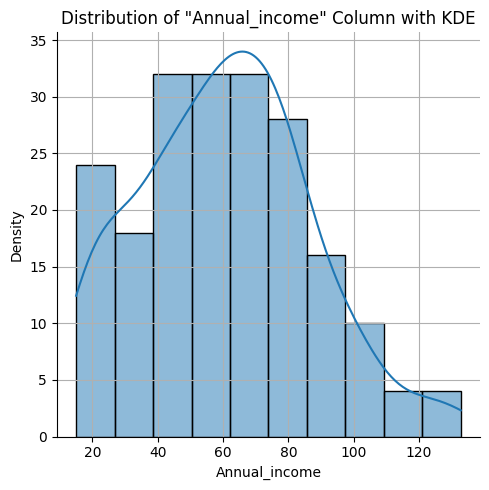

In [20]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.displot(data['Annual_income'], kde=True)
plt.xlabel('Annual_income')
plt.ylabel('Density')
plt.title('Distribution of "Annual_income" Column with KDE')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

In [21]:
data['Annual_income'].skew()

0.29124893139168184

<Figure size 800x600 with 0 Axes>

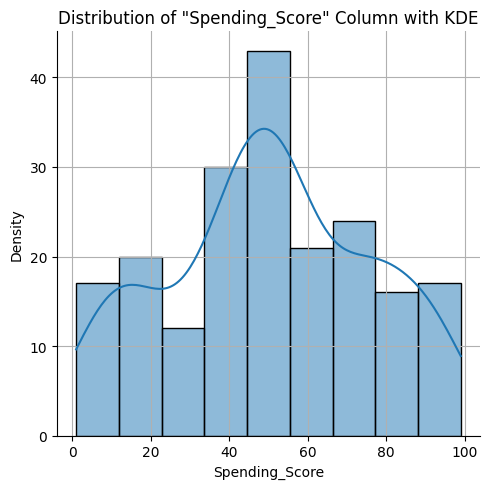

In [22]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.displot(data['Spending_Score'], kde=True)
plt.xlabel('Spending_Score')
plt.ylabel('Density')
plt.title('Distribution of "Spending_Score" Column with KDE')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

# EDA

In [23]:
data

,Gender,Age,Annual_income,Spending_Score
0,Male,19,15.00,39
1,Male,21,15.00,81
2,Female,20,16.00,6
3,Female,23,16.00,77
4,Female,31,17.00,40
...,...,...,...,...
195,Female,35,120.00,79
196,Female,45,126.00,28
197,Male,32,126.00,74
198,Male,32,132.75,18


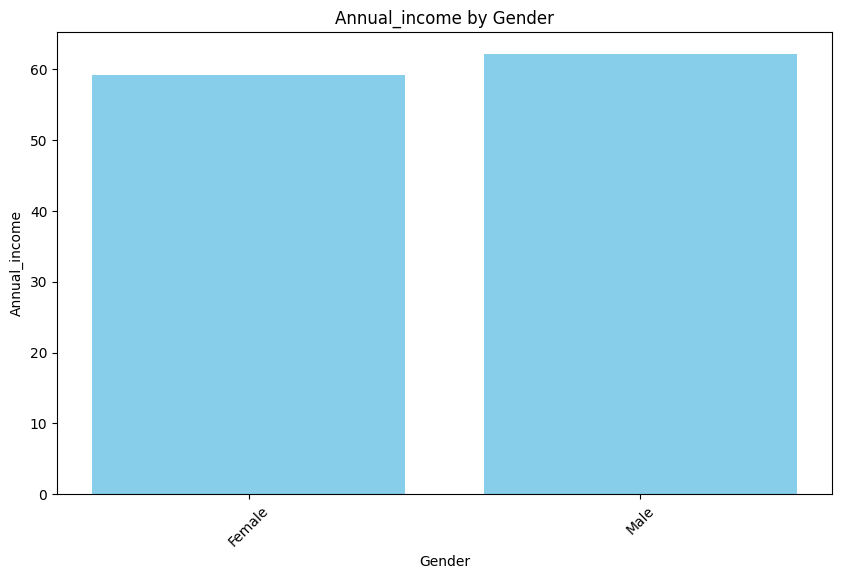

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'data' is a pandas DataFrame
# Group the data by 'University_Ranking' and calculate the mean 'Chance_of_Admit'
grouped_data = data.groupby('Gender')['Annual_income'].mean().reset_index()

# Create the bar plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar(grouped_data['Gender'], grouped_data['Annual_income'], color='skyblue')
plt.title("Annual_income by Gender")
plt.xlabel("Gender")
plt.ylabel("Annual_income")
plt.xticks(rotation=45)  # Rotate x-axis labels if needed

# Show the plot (if using a Jupyter Notebook)
plt.show()


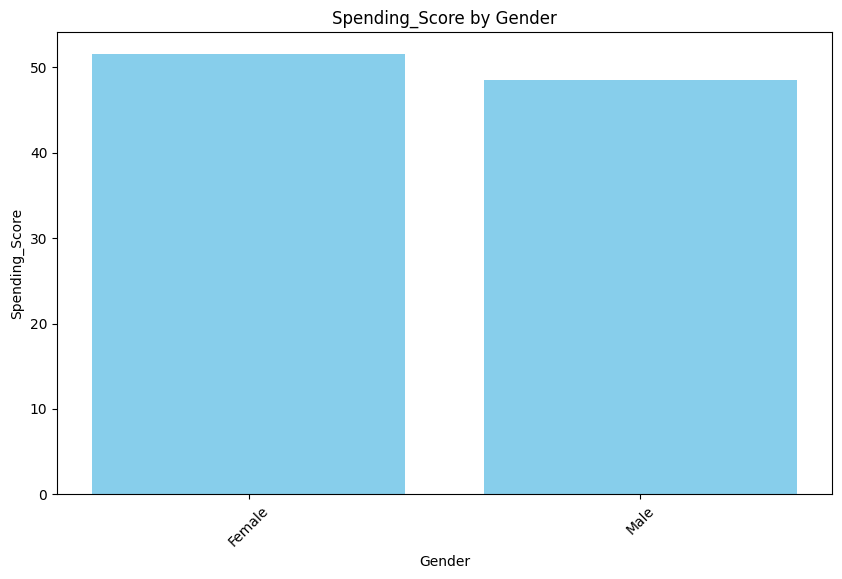

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'data' is a pandas DataFrame
# Group the data by 'University_Ranking' and calculate the mean 'Chance_of_Admit'
grouped_data = data.groupby('Gender')['Spending_Score'].mean().reset_index()

# Create the bar plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar(grouped_data['Gender'], grouped_data['Spending_Score'], color='skyblue')
plt.title("Spending_Score by Gender")
plt.xlabel("Gender")
plt.ylabel("Spending_Score")
plt.xticks(rotation=45)  # Rotate x-axis labels if needed

# Show the plot (if using a Jupyter Notebook)
plt.show()


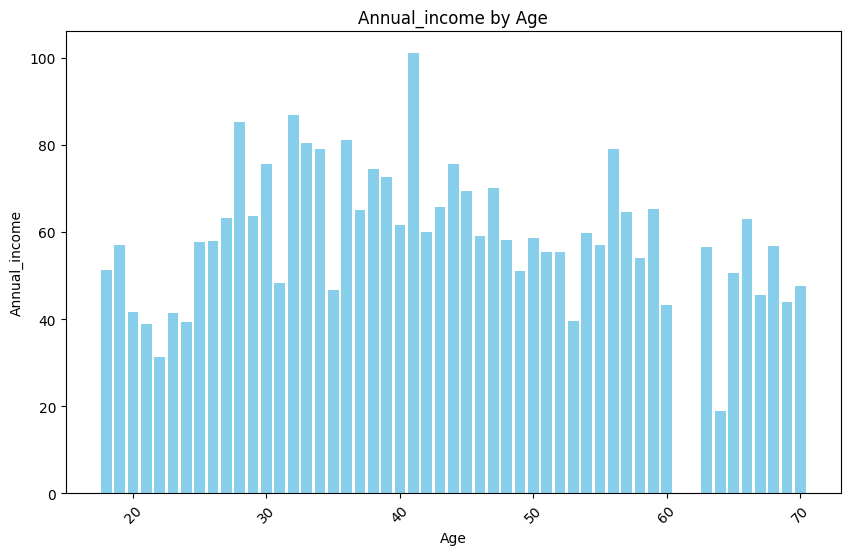

In [26]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'data' is a pandas DataFrame
# Group the data by 'University_Ranking' and calculate the mean 'Chance_of_Admit'
grouped_data = data.groupby('Age')['Annual_income'].mean().reset_index()

# Create the bar plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar(grouped_data['Age'], grouped_data['Annual_income'], color='skyblue')
plt.title("Annual_income by Age")
plt.xlabel("Age")
plt.ylabel("Annual_income")
plt.xticks(rotation=45)  # Rotate x-axis labels if needed

# Show the plot (if using a Jupyter Notebook)
plt.show()


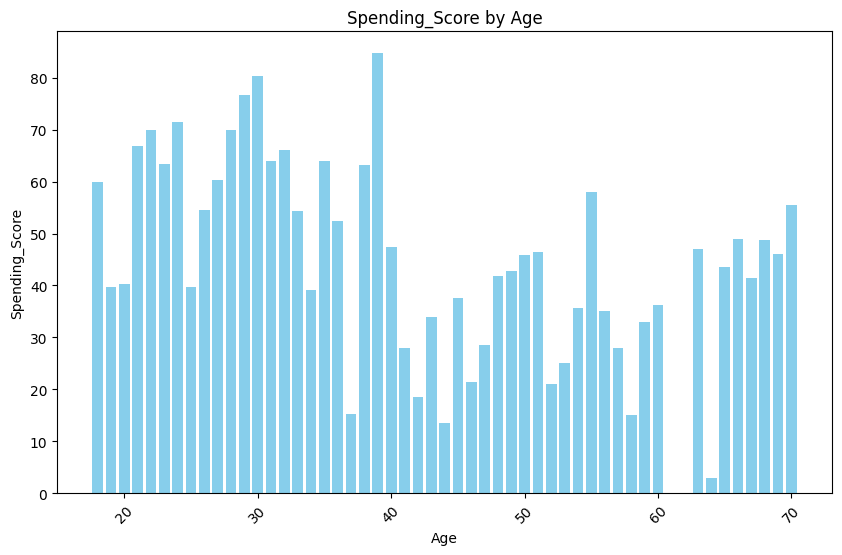

In [27]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'data' is a pandas DataFrame
# Group the data by 'University_Ranking' and calculate the mean 'Chance_of_Admit'
grouped_data = data.groupby('Age')['Spending_Score'].mean().reset_index()

# Create the bar plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar(grouped_data['Age'], grouped_data['Spending_Score'], color='skyblue')
plt.title("Spending_Score by Age")
plt.xlabel("Age")
plt.ylabel("Spending_Score")
plt.xticks(rotation=45)  # Rotate x-axis labels if needed

# Show the plot (if using a Jupyter Notebook)
plt.show()


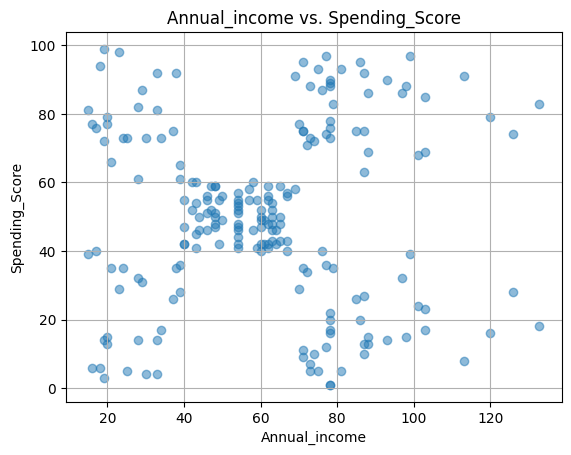

In [28]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'data' is a pandas DataFrame
# Access columns directly to create the scatter plot
plt.scatter(data['Annual_income'], data['Spending_Score'], alpha=0.5)  # 'alpha' adjusts point transparency
plt.title("Annual_income vs. Spending_Score")
plt.xlabel("Annual_income")
plt.ylabel("Spending_Score")
plt.grid(True)

# Show the plot (if using a Jupyter Notebook)
plt.show()


# ENCODE

In [29]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Assuming your data is in a DataFrame named 'df', and the 'Gender' column is at index 0
data['Gender'] = label_encoder.fit_transform(data['Gender'])


In [65]:
features = data[['Annual_income','Spending_Score']]
features

,Annual_income,Spending_Score
0,15.00,39
1,15.00,81
2,16.00,6
3,16.00,77
4,17.00,40
...,...,...
195,120.00,79
196,126.00,28
197,126.00,74
198,132.75,18


In [31]:
data

,Gender,Age,Annual_income,Spending_Score
0,1,19,15.00,39
1,1,21,15.00,81
2,0,20,16.00,6
3,0,23,16.00,77
4,0,31,17.00,40
...,...,...,...,...
195,0,35,120.00,79
196,0,45,126.00,28
197,1,32,126.00,74
198,1,32,132.75,18


   # Scaling

In [32]:
from sklearn.preprocessing import StandardScaler

In [66]:
scaler = StandardScaler()
X = scaler.fit_transform(features)
X
# scaler

array([[-1.74542941, -0.43480148],
       [-1.74542941,  1.19570407],
       [-1.70708307, -1.71591298],
       [-1.70708307,  1.04041783],
       [-1.66873673, -0.39597992],
       [-1.66873673,  1.00159627],
       [-1.6303904 , -1.71591298],
       [-1.6303904 ,  1.70038436],
       [-1.59204406, -1.83237767],
       [-1.59204406,  0.84631002],
       [-1.59204406, -1.4053405 ],
       [-1.59204406,  1.89449216],
       [-1.55369772, -1.36651894],
       [-1.55369772,  1.04041783],
       [-1.55369772, -1.44416206],
       [-1.55369772,  1.11806095],
       [-1.51535138, -0.59008772],
       [-1.51535138,  0.61338066],
       [-1.43865871, -0.82301709],
       [-1.43865871,  1.8556706 ],
       [-1.40031237, -0.59008772],
       [-1.40031237,  0.88513158],
       [-1.36196603, -1.75473454],
       [-1.36196603,  0.88513158],
       [-1.24692702, -1.4053405 ],
       [-1.24692702,  1.23452563],
       [-1.24692702, -0.7065524 ],
       [-1.24692702,  0.41927286],
       [-1.20858069,

C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

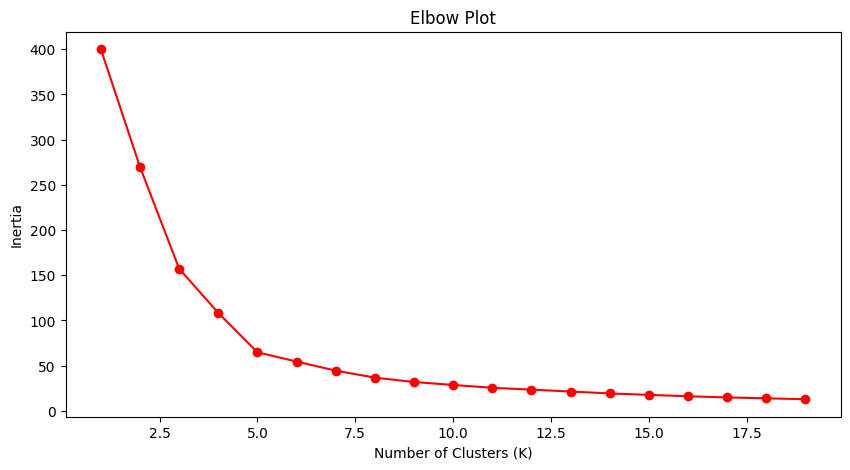

In [67]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming you have your data in X

cluster = []  # To store inertia values for different K values

for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X)
    cluster.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 20), cluster, marker='o', color='red')
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()


In [70]:
kmeans=KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans=kmeans.fit_predict(X)

C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


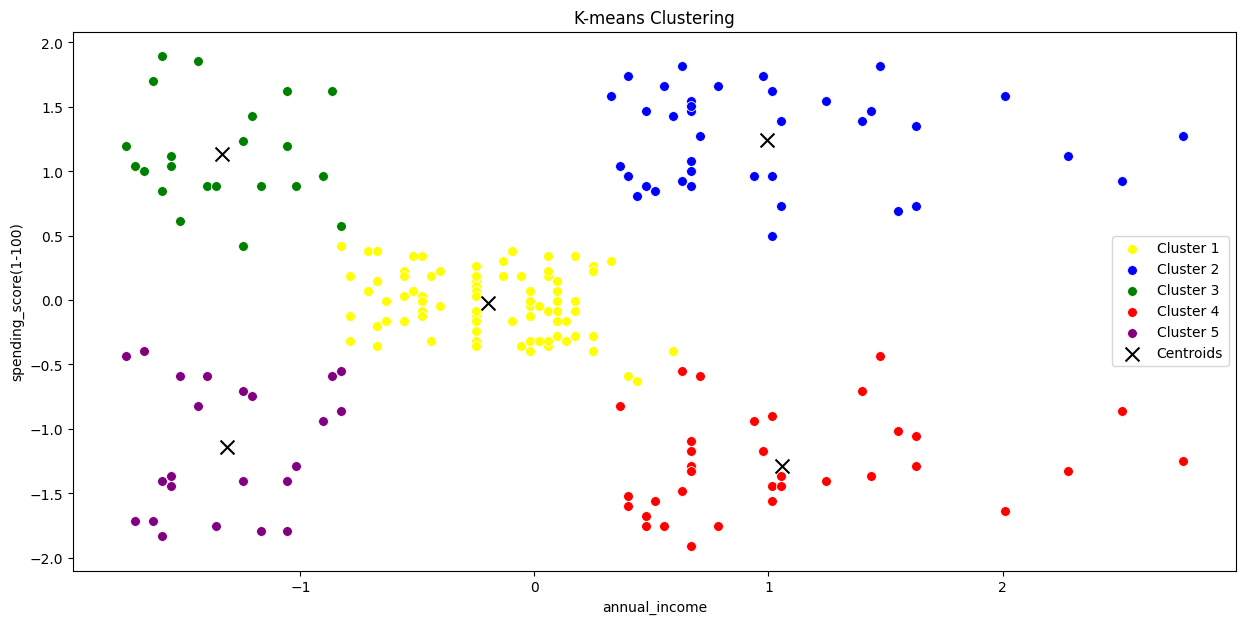

In [72]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you've already defined kmeans and y_kmeans as you mentioned

plt.figure(figsize=(15, 7))

# Scatter plot for cluster 1
sns.scatterplot(x=X[y_kmeans == 0, 0], y=X[y_kmeans == 0, 1], color='yellow', label='Cluster 1', s=50)

# You can add similar code for the other clusters (clusters 2, 3, 4, and 5)
sns.scatterplot(x=X[y_kmeans == 1, 0], y=X[y_kmeans == 1, 1], color='blue', label='Cluster 2', s=50)
sns.scatterplot(x=X[y_kmeans == 2, 0], y=X[y_kmeans == 2, 1], color='green', label='Cluster 3', s=50)
sns.scatterplot(x=X[y_kmeans == 3, 0], y=X[y_kmeans == 3, 1], color='red', label='Cluster 4', s=50)
sns.scatterplot(x=X[y_kmeans == 4, 0], y=X[y_kmeans == 4, 1], color='purple', label='Cluster 5', s=50)

# Add cluster centers if needed
cluster_centers = kmeans.cluster_centers_
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='black', marker='x', s=100, label='Centroids')

plt.title('K-means Clustering')
plt.xlabel('annual_income')
plt.ylabel('spending_score(1-100)')
plt.legend()
plt.show()
